In [1]:
    import pandas
import pandas as pd
import numpy as np

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

split_day = data["date"].iloc[-1] - pd.DateOffset(years=1)
data_train = data[(data["date"] < split_day)].copy()     ##change split accordingly  to makle it fit to 25 % like on feature computation

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911027 entries, 0 to 911026
Data columns (total 67 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   song_id                 911027 non-null  object        
 1   song_name               911027 non-null  object        
 2   song_popularity         911027 non-null  float64       
 3   explicit                911027 non-null  bool          
 4   song_type               911027 non-null  object        
 5   track_number            911027 non-null  float64       
 6   num_artists             911027 non-null  float64       
 7   num_available_markets   911027 non-null  float64       
 8   release_date            911027 non-null  object        
 9   duration_ms             911027 non-null  float64       
 10  key                     911027 non-null  float64       
 11  mode                    911027 non-null  float64       
 12  time_signature          911027 non-

In [3]:
data.describe()

,song_popularity,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
count,911027.000000,911027.000000,911027.000000,911027.000000,9.110270e+05,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,...,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,911027.000000,911027
mean,7.395951,8.686955,1.082063,70.515338,2.294922e+05,5.210870,0.705957,3.906517,0.327322,0.584527,...,0.990808,0.880408,0.991340,0.007710,0.001012,0.432401,0.045818,0.162232,0.010339,2011-06-03 11:26:50.250848512
min,0.000000,1.000000,1.000000,0.000000,1.672000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1995-01-01 00:00:00
25%,0.000000,3.000000,1.000000,78.000000,1.835000e+05,2.000000,0.000000,4.000000,0.026100,0.485000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-06-01 00:00:00
50%,0.000000,7.000000,1.000000,79.000000,2.202400e+05,5.000000,1.000000,4.000000,0.200000,0.599000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013-01-01 00:00:00
75%,9.000000,12.000000,1.000000,79.000000,2.591070e+05,8.000000,1.000000,4.000000,0.608000,0.701000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-08-19 00:00:00
max,100.000000,125.000000,2.000000,79.000000,6.032273e+06,11.000000,1.000000,5.000000,0.996000,0.992000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,40.000000,1.000000,1.000000,2019-08-26 00:00:00
std,12.850693,6.891276,0.274461,22.634266,9.584608e+04,3.534452,0.454440,0.404534,0.329362,0.164942,...,0.091184,0.283528,0.086329,0.042757,0.016297,2.491145,0.698498,0.368664,0.101153,NaN


In [4]:
data

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
0,7kXUEJmfvRXbzxOC0pHQgb,I Can't Believe I'm Losing You,5.0,False,Solo,12.0,1.0,79.0,1995-01-01,162667.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1995-01-01
3659,1qWiKzVrG0GQd1qbgKCsSF,I've Grown Accustomed To Her Face,14.0,False,Solo,2.0,1.0,79.0,1995-01-01,349120.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1995-01-01
3658,1oNYa5jcL10TbXQSPRgbsk,Come Back To Me,16.0,False,Solo,5.0,1.0,2.0,1995-01-01,206093.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1995-01-01
3657,7A131DrpfbWAfNJLrxikwf,Top Of The Stairs,26.0,False,Solo,4.0,1.0,2.0,1995-01-01,271307.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1995-01-01
3656,4SRjOJm5AjO3fxXpZSTEBb,Never Crossed My Mind,20.0,False,Solo,3.0,1.0,2.0,1995-01-01,242027.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,1995-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911001,1EeuFwQ7RhTNlPg69LGUxM,All the Kids on the Street,5.0,False,Solo,6.0,1.0,79.0,2019-08-23,192401.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
911000,2O9CikWfjkYAgGCBws5Pl4,Baby I'll Give It to You,1.0,False,Solo,25.0,1.0,76.0,2019-08-23,194907.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
911025,2CZ46u5NGXQFXke3PMCuAK,Today I Started Loving You Again,3.0,False,Solo,15.0,1.0,78.0,2019-08-23,172147.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23
911012,6zhg8TnVKi90ITDzFKwPr0,Swingtown - Alternate Version,26.0,False,Solo,5.0,1.0,79.0,2019-08-23,205707.0,...,1.0,1.0,1.0,0.0,0.0,0,0,0,0,2019-08-23


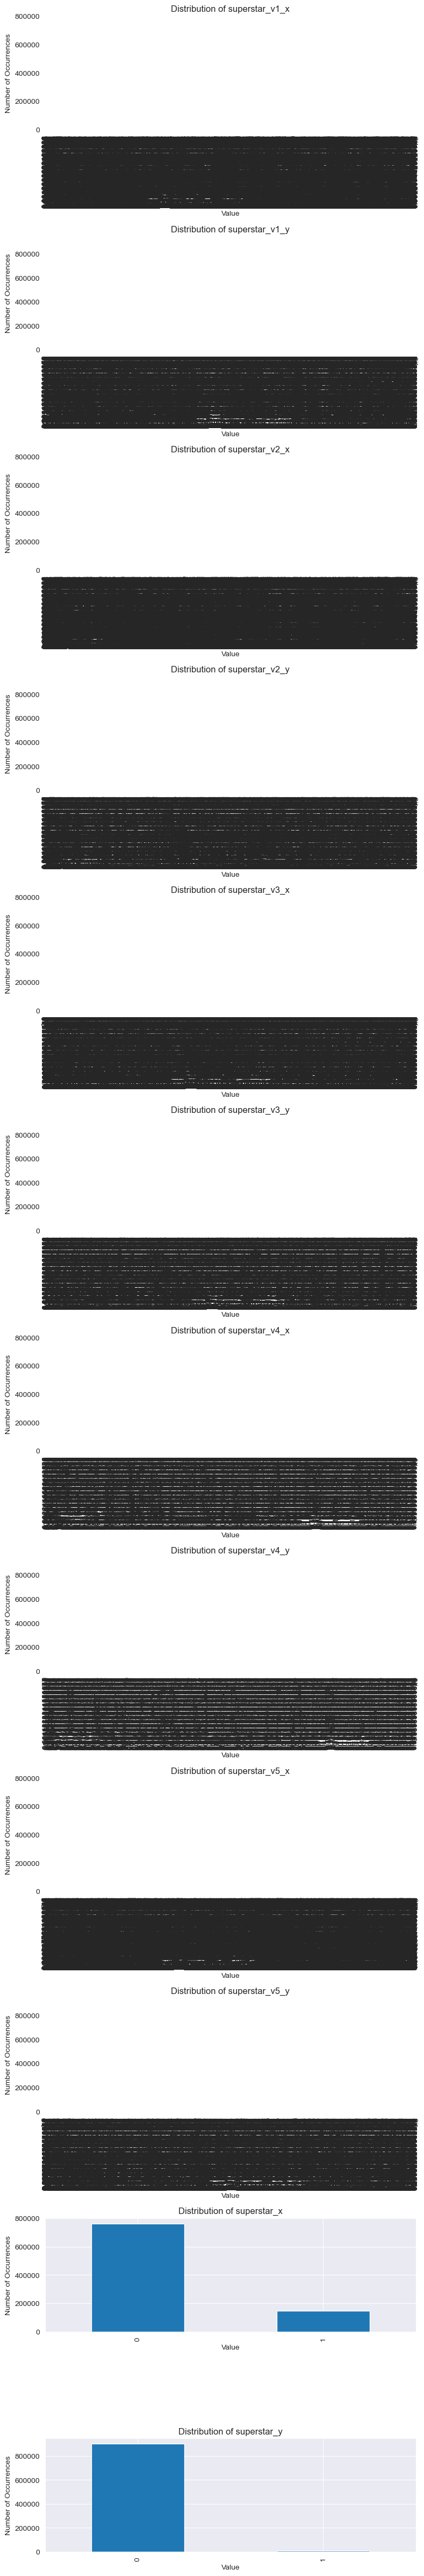

In [5]:
import matplotlib.pyplot as plt

superstar_columns = [col for col in data.columns if 'superstar' in col]
data_superstar = data[superstar_columns]

# Number of 'superstar' columns
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(8, 4*num_superstar_columns))

# Plot bar plots for each 'superstar' column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    value_counts = data_superstar[column].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of Occurrences')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

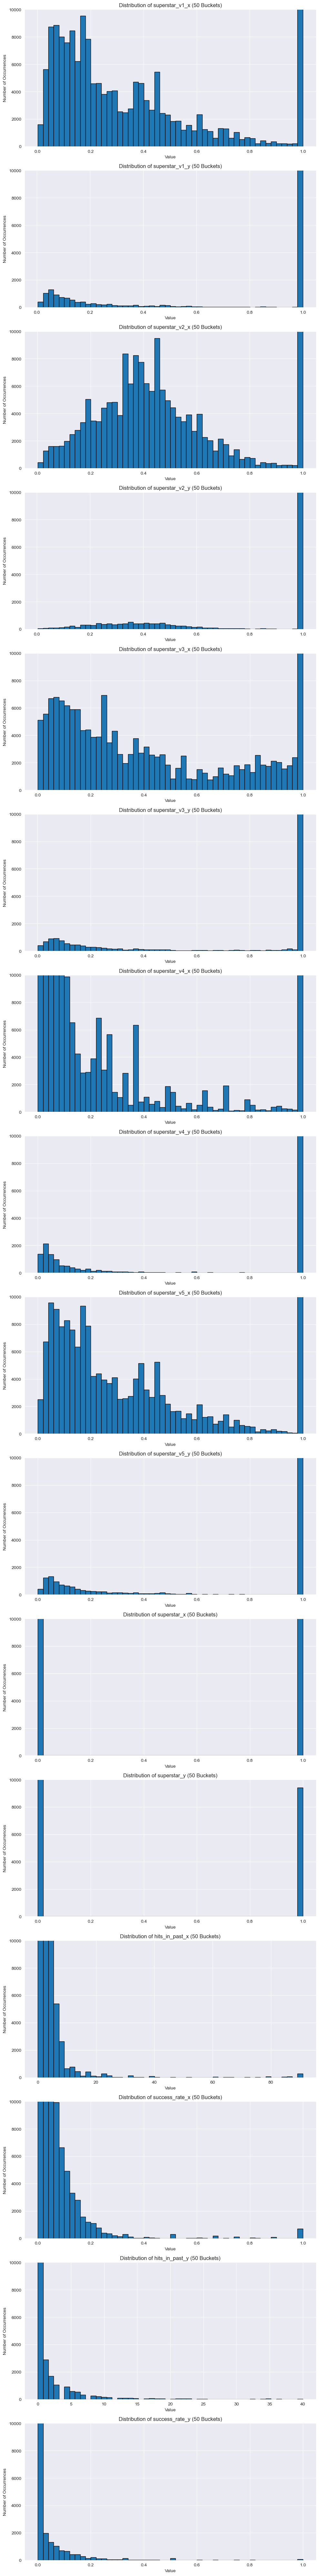

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# Filter the DataFrame to include only the 'superstar' columns
superstar_columns = [col for col in data.columns if 'superstar' in col]
superstar_columns.extend(["hits_in_past_x", "success_rate_x", "hits_in_past_y", "success_rate_y"])
data_superstar = data[superstar_columns]

# Number of 'superstar' columns
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(10, 5*num_superstar_columns))

# Plot bar plots for each 'superstar' column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    # Calculate value counts in 50 bins
    counts, bins = np.histogram(data_superstar[column].dropna(), bins=50)
    # Calculate the center of each bin
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plotting
    ax.bar(bin_centers, counts, width=bins[1]-bins[0], edgecolor='black')
    ax.set_title(f'Distribution of {column} (50 Buckets)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of Occurrences')
    ax.set_ylim(0, 10000)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


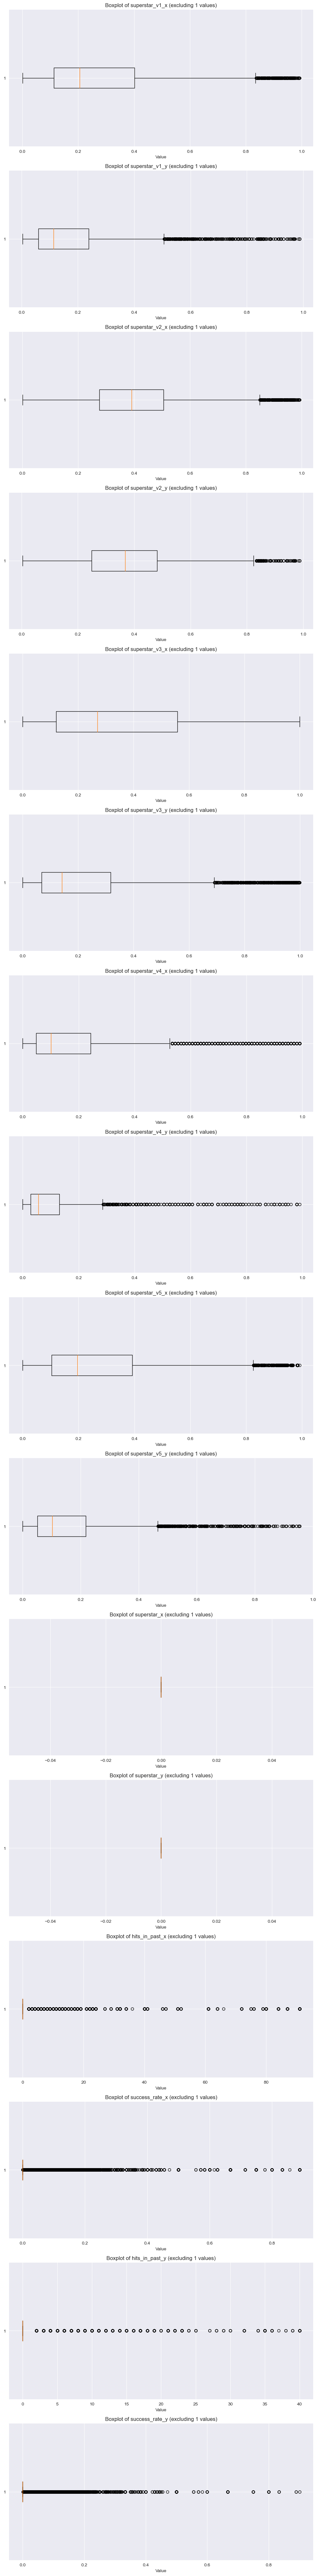

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame to include only the 'superstar' and other selected columns
superstar_columns = [col for col in data.columns if 'superstar' in col]
superstar_columns.extend(["hits_in_past_x", "success_rate_x", "hits_in_past_y", "success_rate_y"])
data_superstar = data[superstar_columns]

# Number of columns to plot
num_superstar_columns = len(data_superstar.columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_superstar_columns, ncols=1, figsize=(10, 5*num_superstar_columns))

# Plot boxplots for each column in subplots
for i, column in enumerate(data_superstar.columns):
    ax = axes[i] if num_superstar_columns > 1 else axes
    # Filter out the rows where the value is 1
    filtered_data = data_superstar[column][data_superstar[column] != 1].dropna()
    ax.boxplot(filtered_data, vert=False)
    ax.set_title(f'Boxplot of {column} (excluding 1 values)')
    ax.set_xlabel('Value')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

therefore maybe use superstar v2 and 3 only

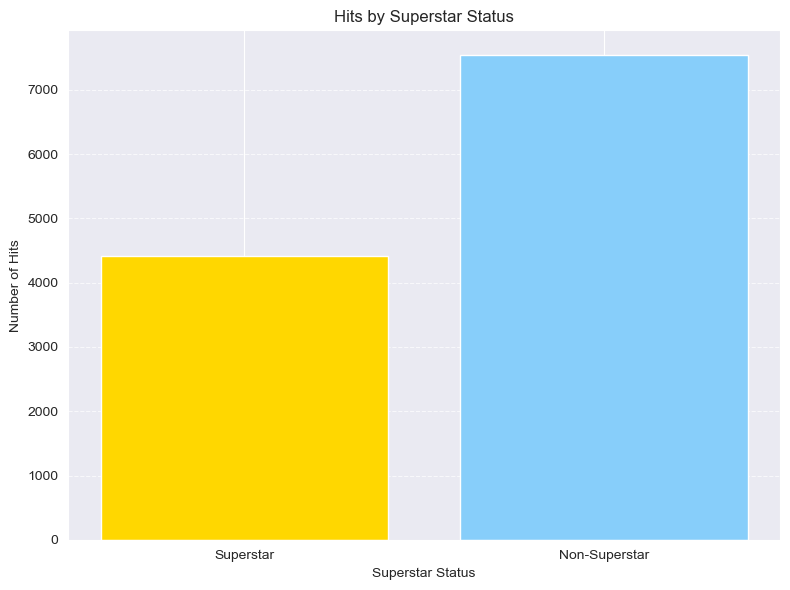

In [8]:
import matplotlib.pyplot as plt

superstar_hits = data[(data['superstar_x'] == 1)]['hit'].sum()
non_superstar_hits = data[data['superstar_x'] == 0]['hit'].sum()

# Prepare data for the bar chart
to_plot = [superstar_hits, non_superstar_hits]
categories = ['Superstar', 'Non-Superstar']

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(categories, to_plot, color=['gold', 'lightskyblue'])
plt.xlabel('Superstar Status')
plt.ylabel('Number of Hits')
plt.title('Hits by Superstar Status')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

# Display the chart
plt.tight_layout()
plt.show()

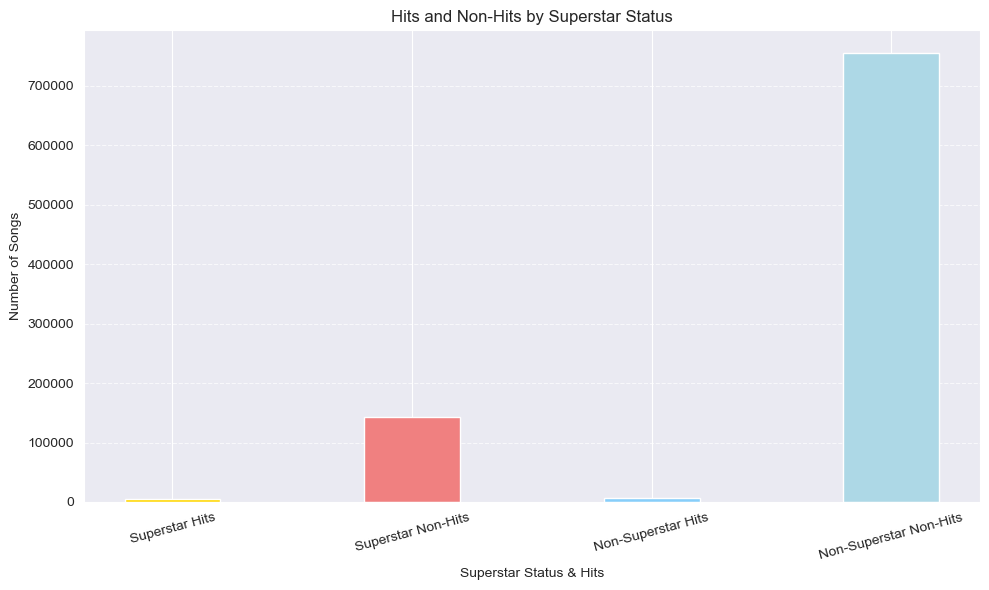

In [9]:
import matplotlib.pyplot as plt

# Filter data for superstars and non-superstars
superstars = data[data['superstar_x'] == 1]
non_superstars = data[data['superstar_x'] == 0]

# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

# Prepare data for the bar chart
data = [superstar_hits, superstar_non_hits, non_superstar_hits, non_superstar_non_hits]
categories = ['Superstar Hits', 'Superstar Non-Hits', 'Non-Superstar Hits', 'Non-Superstar Non-Hits']

# Create the bar chart with adjusted width for better visibility
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(categories, data, color=['gold', 'lightcoral', 'lightskyblue', 'lightblue'], width=0.4)
plt.xlabel('Superstar Status & Hits')
plt.ylabel('Number of Songs')
plt.title('Hits and Non-Hits by Superstar Status')
plt.xticks(rotation=15)  # Rotate x-axis labels slightly for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

# Display the chart
plt.tight_layout()
plt.show()


4414.0
2.9865086131070786


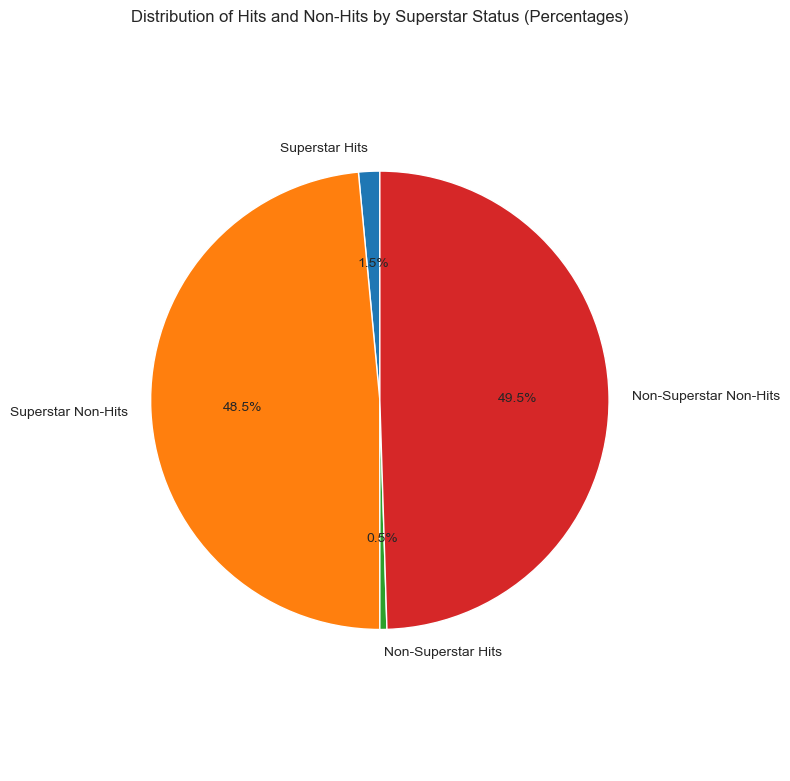

In [10]:
# Filter data for superstars and non-superstars
#superstars = data[data['superstar_x'] == 1]
#non_superstars = data[data['superstar_x'] == 0]

#print(superstars)

# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

print(superstar_hits)

# Calculate total songs for each category
total_superstar_songs = len(superstars)
total_non_star_songs = len(non_superstars)

# Prepare data for the pie chart (percentages)
superstar_hit_pct = (superstar_hits / total_superstar_songs) * 100
superstar_non_hit_pct = (superstar_non_hits / total_superstar_songs) * 100
non_star_hit_pct = (non_superstar_hits / total_non_star_songs) * 100
non_star_non_hit_pct = (non_superstar_non_hits / total_non_star_songs) * 100

print(superstar_hit_pct)

# Combine data into lists for the pie chart
labels = ['Superstar Hits', 'Superstar Non-Hits', 'Non-Superstar Hits', 'Non-Superstar Non-Hits']
sizes = [superstar_hit_pct, superstar_non_hit_pct, non_star_hit_pct, non_star_non_hit_pct]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)  # Customize options
plt.title('Distribution of Hits and Non-Hits by Superstar Status (Percentages)')
plt.axis('equal')  # Equal aspect ratio for a circular pie chart

# Display the chart
plt.tight_layout()
plt.show()

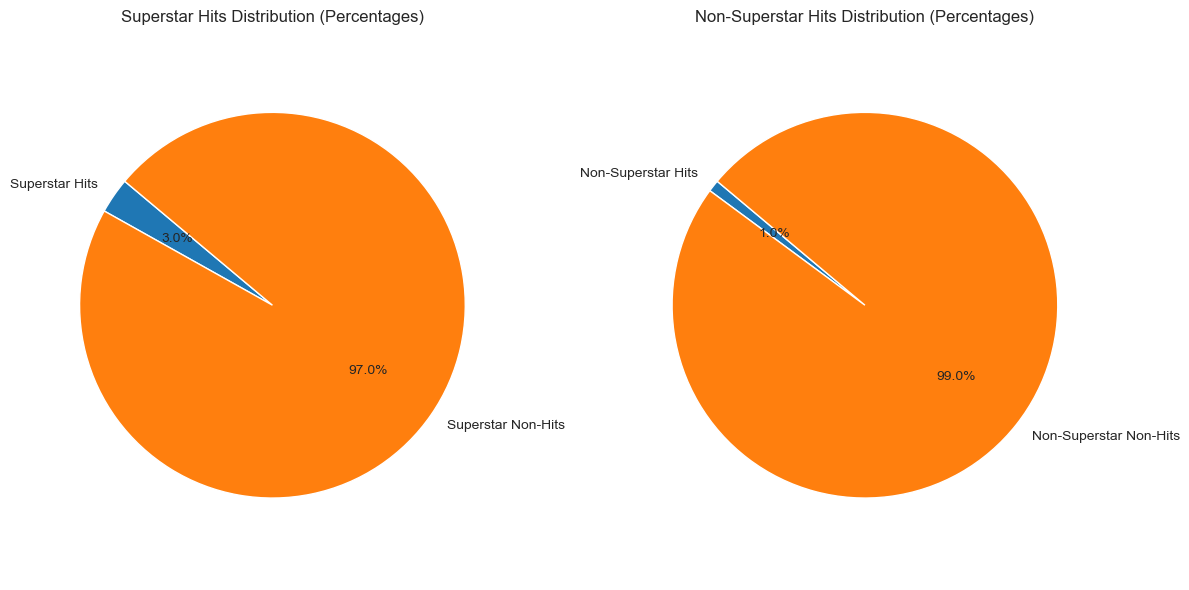

In [11]:
# Count hits and non-hits
superstar_hits = superstars['hit'].sum()
superstar_non_hits = len(superstars) - superstar_hits  # Assuming all rows have a value in 'hit'

non_superstar_hits = non_superstars['hit'].sum()
non_superstar_non_hits = len(non_superstars) - non_superstar_hits

# Prepare data for superstar pie chart
superstar_labels = ['Superstar Hits', 'Superstar Non-Hits']
superstar_sizes = [superstar_hits, superstar_non_hits]

# Prepare data for non-superstar pie chart
non_star_labels = ['Non-Superstar Hits', 'Non-Superstar Non-Hits']
non_star_sizes = [non_superstar_hits, non_superstar_non_hits]

startangle = 140

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figure size as desired

# Create the pie chart for superstars
ax1.pie(superstar_sizes, labels=superstar_labels, autopct="%1.1f%%", startangle=140)
ax1.set_title('Superstar Hits Distribution (Percentages)')
ax1.axis('equal')  # Equal aspect ratio for a circular pie chart

# Create the pie chart for non-superstars
ax2.pie(non_star_sizes, labels=non_star_labels, autopct="%1.1f%%", startangle=140)
ax2.set_title('Non-Superstar Hits Distribution (Percentages)')
ax2.axis('equal')  # Equal aspect ratio for a circular pie chart



# Display the chart
plt.tight_layout()
plt.show()

In [12]:
columns = ["hit", 'explicit', 'num_available_markets',
            'instrumentalness', 'loudness', 'years_on_charts', "superstar_x"] 
            #"hits_in_past_x", "success_rate_x", "superstar_x", "superstar_v5_x","superstar_v4_x","superstar_v3_x","superstar_v2_x","superstar_v1_x"] 
             #"hits_in_past_y", "success_rate_y", "superstar_y", "superstar_v5_y","superstar_v4_y","superstar_v3_y","superstar_v2_y","superstar_v1_y"]#"pagerank_x", "pagerank_y", "success_rate_x", "success_rate_y", "hits_in_past_x", "hits_in_past_y"]#, "superstar_v5_x","superstar_v4_x","superstar_v3_x","superstar_v2_x","superstar_v1_x", "superstar_v5_y"]
#columns = ["hit", "pagerank_x", "pagerank_y"]#"degree_x", "weighted degree_x", "eccentricity_x", "closnesscentrality_x", "clustering_x", "betweenesscentrality_x", "eigencentrality_x","degree_y", "weighted degree_y", "eccentricity_y", "closnesscentrality_y", "clustering_y", "betweenesscentrality_y", "eigencentrality_y"]

Correlation Matrix:
                            hit  explicit  num_available_markets  \
hit                    1.000000  0.025265               0.021138   
explicit               0.025265  1.000000              -0.018457   
num_available_markets  0.021138 -0.018457               1.000000   
instrumentalness      -0.064236 -0.158446               0.149862   
loudness               0.055959  0.139257              -0.129837   
years_on_charts        0.802989  0.020448               0.016932   
superstar_x            0.065791  0.110613              -0.120487   

                       instrumentalness  loudness  years_on_charts  \
hit                           -0.064236  0.055959         0.802989   
explicit                      -0.158446  0.139257         0.020448   
num_available_markets          0.149862 -0.129837         0.016932   
instrumentalness               1.000000 -0.369549        -0.052868   
loudness                      -0.369549  1.000000         0.052154   
years_on_charts

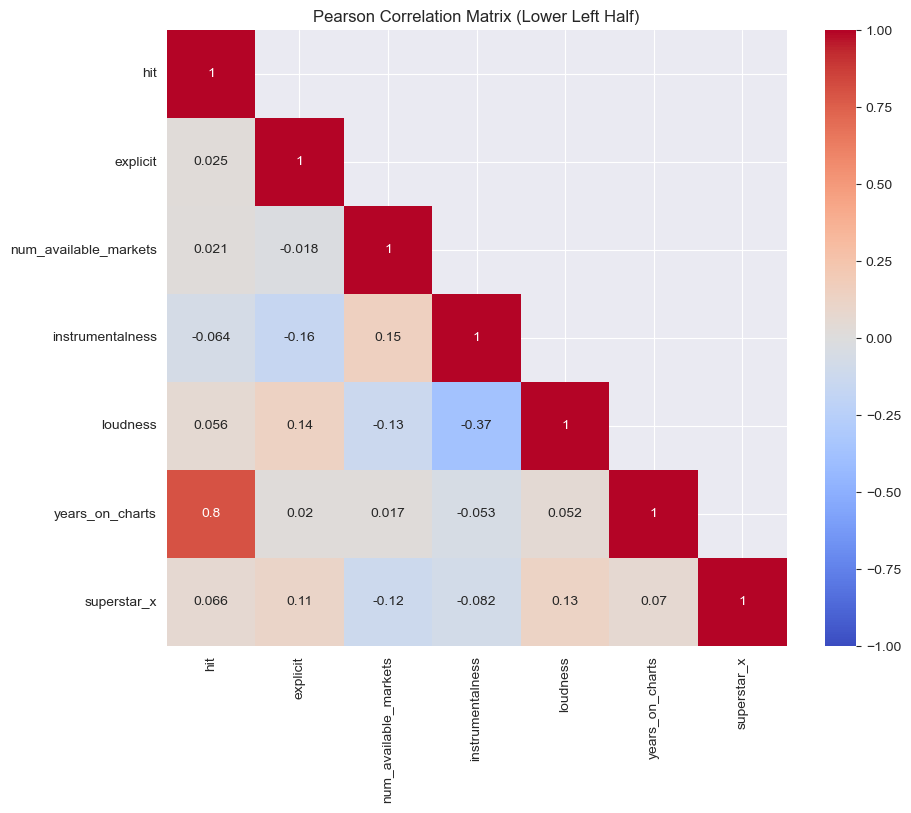

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = data_train[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                            hit  explicit  num_available_markets  \
hit                    1.000000  0.025265              -0.060431   
explicit               0.025265  1.000000              -0.040507   
num_available_markets -0.060431 -0.040507               1.000000   
instrumentalness      -0.070545 -0.231060               0.190524   
loudness               0.059656  0.156721              -0.202311   
years_on_charts        0.959181  0.019341              -0.057024   
superstar_x            0.065791  0.110613              -0.141631   

                       instrumentalness  loudness  years_on_charts  \
hit                           -0.070545  0.059656         0.959181   
explicit                      -0.231060  0.156721         0.019341   
num_available_markets          0.190524 -0.202311        -0.057024   
instrumentalness               1.000000 -0.380724        -0.066362   
loudness                      -0.380724  1.000000         0.054672   
years_on_charts

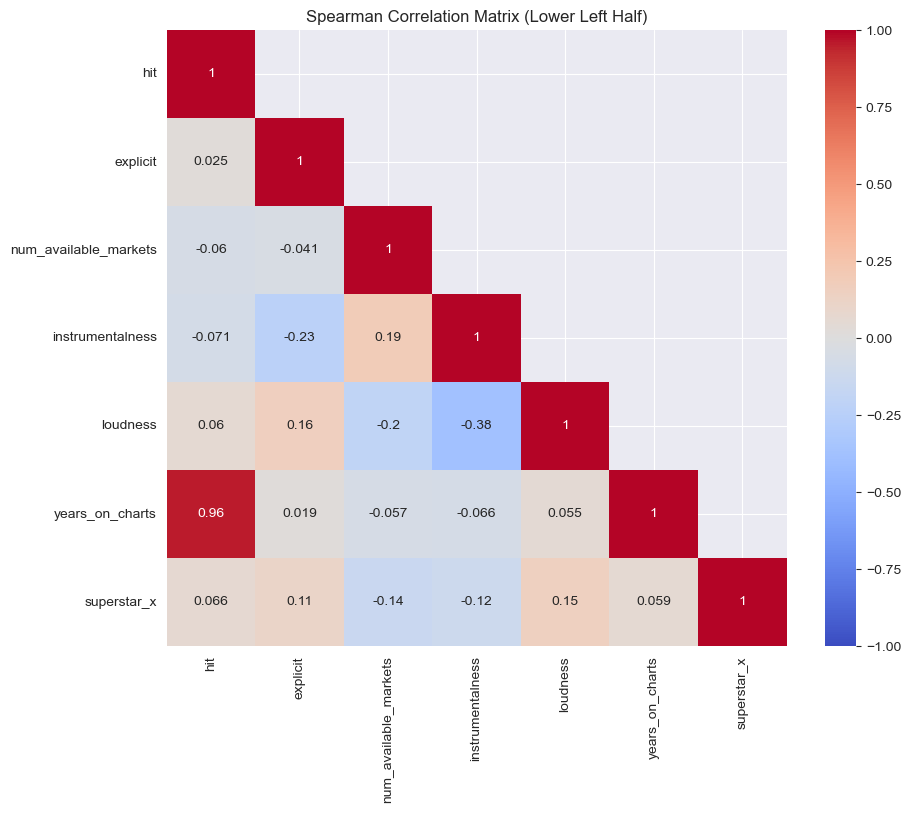

In [14]:
correlation_matr4ix = data_train[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix (Lower Left Half)')
plt.show()

why is pagerank_x negatively correlated???
maybe because less successfullartists with hit artist coop?

In [15]:
df_one_hot = pd.get_dummies(data_train, columns=['Cluster_x', "Cluster_y"], drop_first=True)
df_one_hot

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,Cluster_x_2.0,Cluster_x_3.0,Cluster_x_4.0,Cluster_x_5.0,Cluster_y_0.0,Cluster_y_1.0,Cluster_y_2.0,Cluster_y_3.0,Cluster_y_4.0,Cluster_y_5.0
0,7kXUEJmfvRXbzxOC0pHQgb,I Can't Believe I'm Losing You,5.0,False,Solo,12.0,1.0,79.0,1995-01-01,162667.0,...,False,False,False,False,False,False,False,False,False,False
3659,1qWiKzVrG0GQd1qbgKCsSF,I've Grown Accustomed To Her Face,14.0,False,Solo,2.0,1.0,79.0,1995-01-01,349120.0,...,False,False,False,False,False,False,False,False,False,False
3658,1oNYa5jcL10TbXQSPRgbsk,Come Back To Me,16.0,False,Solo,5.0,1.0,2.0,1995-01-01,206093.0,...,False,False,False,True,False,False,False,False,False,False
3657,7A131DrpfbWAfNJLrxikwf,Top Of The Stairs,26.0,False,Solo,4.0,1.0,2.0,1995-01-01,271307.0,...,False,False,False,True,False,False,False,False,False,False
3656,4SRjOJm5AjO3fxXpZSTEBb,Never Crossed My Mind,20.0,False,Solo,3.0,1.0,2.0,1995-01-01,242027.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856694,4BLEnHP1FInl1u3xAbgI4n,Lullaby,65.0,False,Collaboration,15.0,2.0,75.0,2018-08-25,160184.0,...,False,False,False,False,False,True,False,False,False,False
856695,4p7fb6fjHMcyEebumewT2p,Back to You,34.0,False,Collaboration,13.0,2.0,75.0,2018-08-25,200323.0,...,False,False,False,False,False,True,False,False,False,False
856696,67ERfxHkUp2TPlVU9dAjox,Whiplash,38.0,False,Collaboration,10.0,2.0,75.0,2018-08-25,183913.0,...,False,False,False,False,False,True,False,False,False,False
856697,0FkqXwZLBMFH9VWhJTtlJo,Incy Wincy Spider,0.0,False,Solo,17.0,1.0,79.0,2018-08-25,95930.0,...,True,False,False,False,False,False,False,False,False,False


In [16]:
one_hot_columns = [col for col in df_one_hot.columns if col not in data_train.columns]

In [17]:
#columns.extend(one_hot_columns)
columns = ["hit"]
columns.extend(one_hot_columns)

Correlation Matrix:
                    hit  Cluster_x_0.0  Cluster_x_1.0  Cluster_x_2.0  \
hit            1.000000       0.032169      -0.015166      -0.014715   
Cluster_x_0.0  0.032169       1.000000      -0.636066      -0.239558   
Cluster_x_1.0 -0.015166      -0.636066       1.000000      -0.277540   
Cluster_x_2.0 -0.014715      -0.239558      -0.277540       1.000000   
Cluster_x_3.0  0.007116      -0.158497      -0.183627      -0.069158   
Cluster_x_4.0 -0.016693      -0.139258      -0.161337      -0.060763   
Cluster_x_5.0 -0.009327      -0.167813      -0.194420      -0.073223   
Cluster_y_0.0  0.004553       0.303165      -0.194439      -0.073231   
Cluster_y_1.0 -0.010458      -0.089957       0.141131      -0.039252   
Cluster_y_2.0 -0.004085      -0.054433      -0.063063      -0.011582   
Cluster_y_3.0  0.003446      -0.055142      -0.063885      -0.024061   
Cluster_y_4.0 -0.002293       0.010191      -0.037571      -0.014150   
Cluster_y_5.0  0.000859      -0.035371      

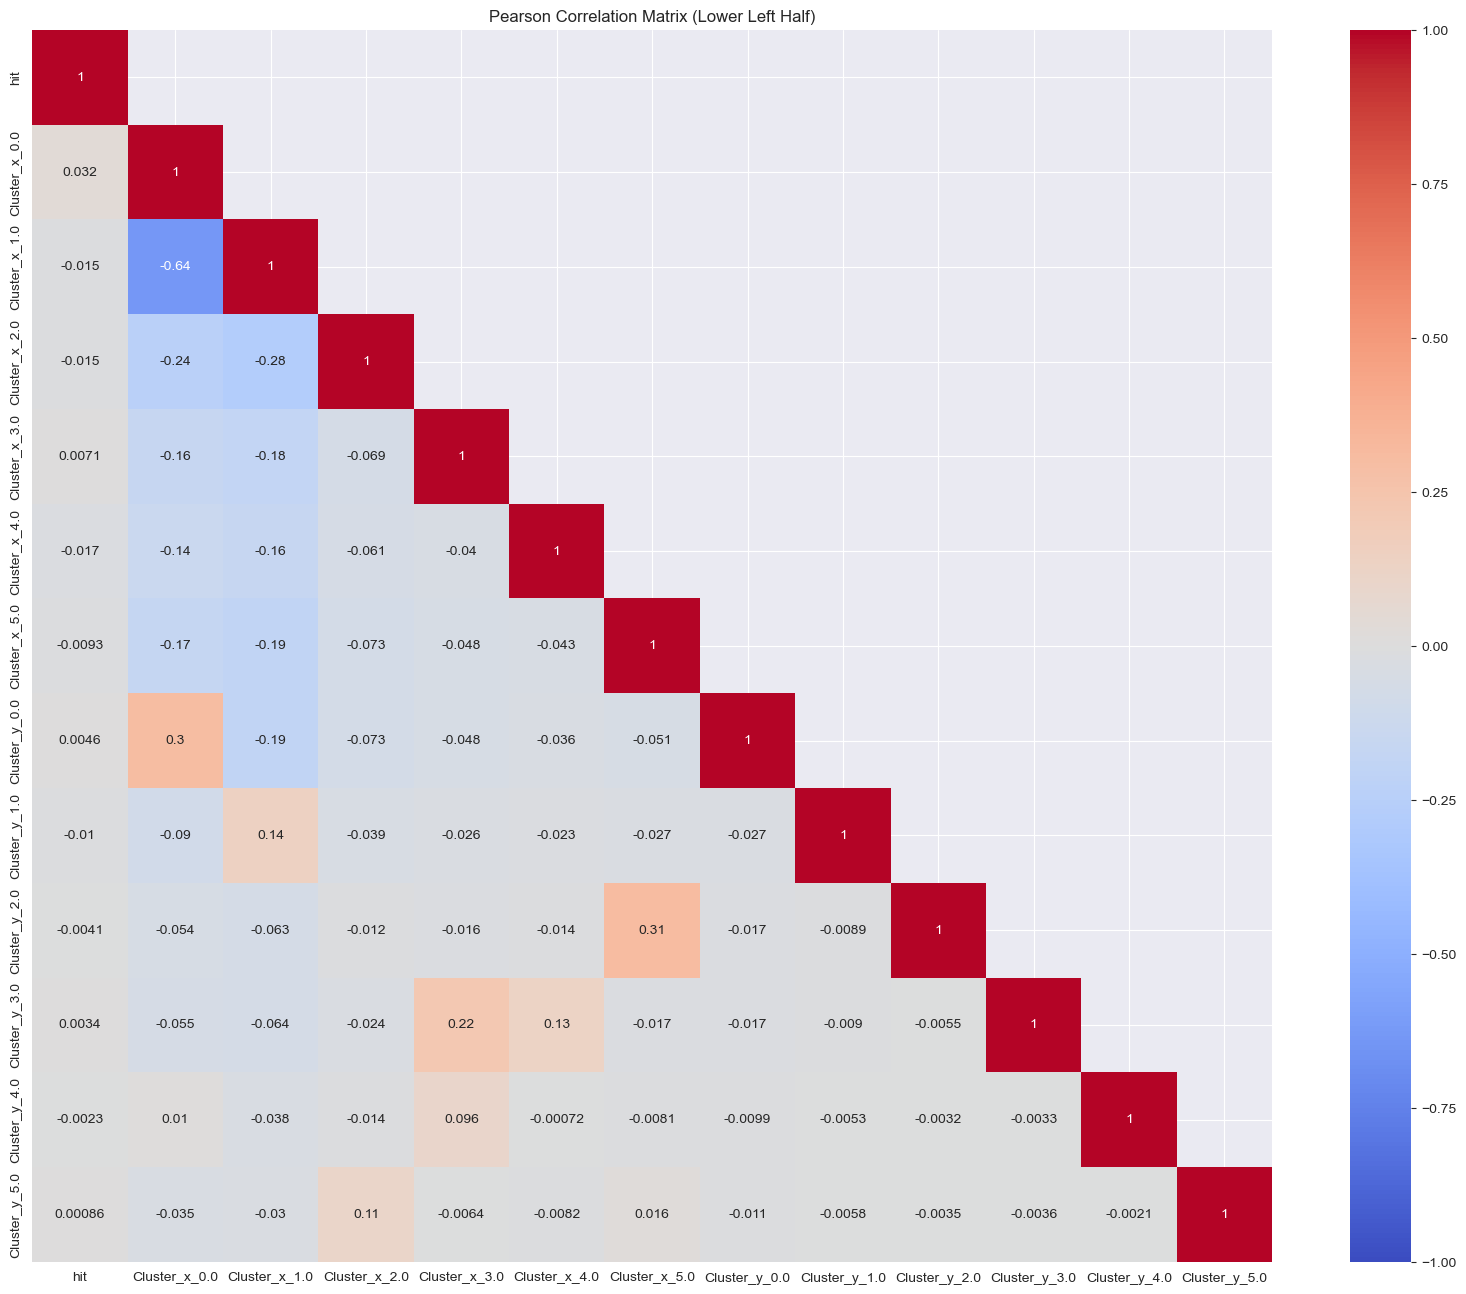

In [18]:
# Assume `data` is your DataFrame and `columns` is the list of columns you want to consider
correlation_matrix = df_one_hot[columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix (Lower Left Half)')
plt.show()

Correlation Matrix:
                    hit  Cluster_x_0.0  Cluster_x_1.0  Cluster_x_2.0  \
hit            1.000000       0.032169      -0.015166      -0.014715   
Cluster_x_0.0  0.032169       1.000000      -0.636066      -0.239558   
Cluster_x_1.0 -0.015166      -0.636066       1.000000      -0.277540   
Cluster_x_2.0 -0.014715      -0.239558      -0.277540       1.000000   
Cluster_x_3.0  0.007116      -0.158497      -0.183627      -0.069158   
Cluster_x_4.0 -0.016693      -0.139258      -0.161337      -0.060763   
Cluster_x_5.0 -0.009327      -0.167813      -0.194420      -0.073223   
Cluster_y_0.0  0.004553       0.303165      -0.194439      -0.073231   
Cluster_y_1.0 -0.010458      -0.089957       0.141131      -0.039252   
Cluster_y_2.0 -0.004085      -0.054433      -0.063063      -0.011582   
Cluster_y_3.0  0.003446      -0.055142      -0.063885      -0.024061   
Cluster_y_4.0 -0.002293       0.010191      -0.037571      -0.014150   
Cluster_y_5.0  0.000859      -0.035371      

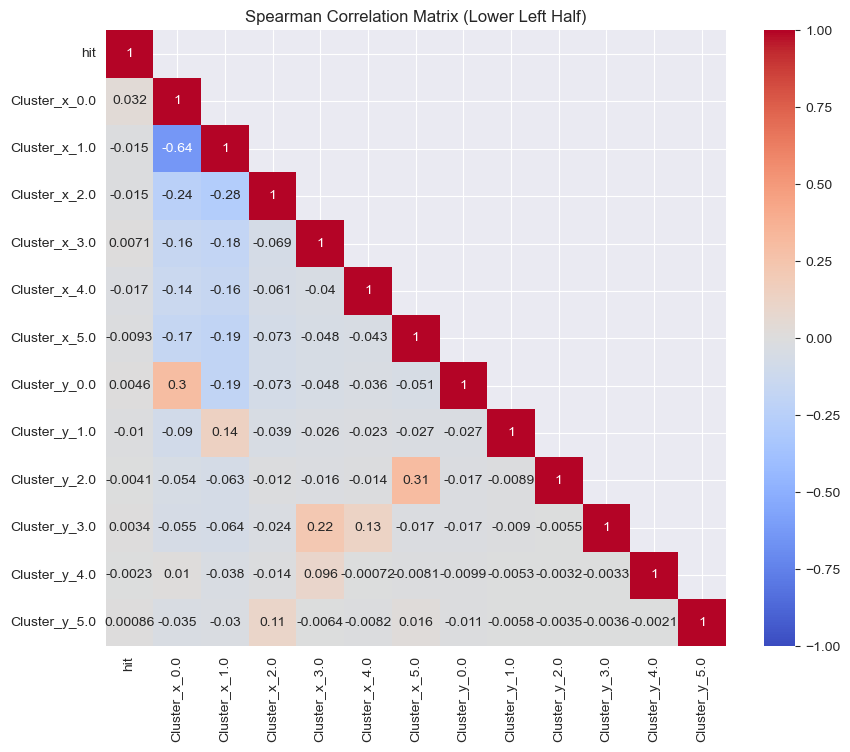

In [19]:
correlation_matrix = df_one_hot[columns].corr(method="spearman")

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
identity_matrix = np.identity(mask.shape[0])
real_mask = mask-identity_matrix
real_mask = real_mask.astype(dtype=bool)

# Plot the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=real_mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix (Lower Left Half)')
plt.show()

plot amount hit songs and successrate of artist by clusters and pagerank as well as superstar var.

## explain on Example of Taylor swift

In [20]:
swift_id = '06HL4z0CvFAxyc27GXpf02'

In [21]:
swift_songs = data_train[(data_train["artist1_id"] == swift_id) | (data_train["artist2_id"] == swift_id)]
swift_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
183542,7DQmwd7zye9xvzMQJnD8S8,Tim McGraw,56.0,False,Solo,2.0,1.0,79.0,2006-10-23,234547.0,...,1.000000,0.078086,1.000000,0.038462,0.00,1,0,1,0,2006-10-23
183515,7snx7w5WZLHovS0xC45ZfP,Teardrops On My Guitar - Radio Single Remix,64.0,False,Solo,6.0,1.0,79.0,2006-10-23,204707.0,...,1.000000,0.078086,1.000000,0.038462,0.00,1,0,1,0,2006-10-23
183513,1nuk1yTZO3zR8XB8Ofk9q3,Picture To Burn,56.0,False,Solo,4.0,1.0,79.0,2006-10-23,175280.0,...,1.000000,0.078086,1.000000,0.038462,0.00,1,0,1,0,2006-10-23
183564,0T2kNwYw4Z7rhziNRNsjfO,Should've Said No,50.0,False,Solo,18.0,1.0,79.0,2006-10-23,244080.0,...,1.000000,0.078086,1.000000,0.038462,0.00,1,0,1,0,2006-10-23
183550,43H3q2NWT9LCuYS1B5IUvV,Our Song,61.0,False,Solo,22.0,1.0,79.0,2006-10-23,203440.0,...,1.000000,0.078086,1.000000,0.038462,0.00,1,0,1,0,2006-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824088,7FFfYM4JE1vj5n4rhHxg8q,Babe (feat. Taylor Swift),49.0,False,Collaboration,1.0,2.0,79.0,2018-04-20,215107.0,...,0.327722,1.000000,0.078751,0.000000,0.75,0,3,0,1,2018-04-20
836844,0SoK5u8MD2VVikNPwXBz74,Babe,56.0,False,Collaboration,15.0,2.0,79.0,2018-06-07,215107.0,...,0.327722,1.000000,0.000000,0.000000,1.00,0,3,0,1,2018-06-07
836838,0L65Q96BYdbLMvXggkqvQc,Babe - Commentary,22.0,False,Collaboration,14.0,2.0,79.0,2018-06-07,330157.0,...,0.327722,1.000000,0.000000,0.000000,1.00,0,3,0,1,2018-06-07
837764,7fRruZ12gXGwBs0zXQ6e5V,Babe,62.0,False,Collaboration,7.0,2.0,79.0,2018-06-08,215107.0,...,0.327722,1.000000,0.000000,0.000000,1.00,0,3,0,1,2018-06-08


Taylor Swift's is part of Cluster 1 

In [22]:
swift_songs["num_artists"].value_counts()

num_artists
1.0    508
2.0     28
Name: count, dtype: int64

In [23]:
swift_songs["hit"].value_counts()

hit
0.0    469
1.0     67
Name: count, dtype: int64

alan walker

In [24]:
walker_id = '7vk5e3vY1uw9plTHJAMwjN'
walker_songs = data_train[(data_train["artist1_id"] == walker_id) | (data_train["artist2_id"] == walker_id)]
walker_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
641265,2lfPecqFbH8X4lHSpTxt8l,Fade,65.0,False,Solo,1.0,1.0,79.0,2014-11-19,264014.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2014-11-19
649432,0lMrWcrVXHPEuVBuc0nRzZ,Spectre,64.0,False,Solo,1.0,1.0,79.0,2015-01-06,230635.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-01-06
663615,4YhITuwINLCfXYB2WCXbCZ,Force,64.0,False,Solo,1.0,1.0,79.0,2015-04-02,240006.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-04-02
703030,7gHs73wELdeycvS48JfIos,Faded,76.0,False,Solo,1.0,1.0,79.0,2015-12-04,212627.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
703199,34F4GJFUzPvPJmGrTpyqlZ,Faded (Restrung),51.0,False,Solo,3.0,1.0,79.0,2015-12-04,217053.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
703191,0RLjnX1vYWvtdThB8LABwo,Faded - Piano Version,47.0,False,Solo,4.0,1.0,79.0,2015-12-04,215080.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
703185,0HmONWWIU1FXkwWLDpqrjl,Faded - Instrumental,54.0,False,Solo,2.0,1.0,79.0,2015-12-04,214013.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2015-12-04
726021,1VNbNTzQS0iIVrlaPXUthv,Faded - Luke Christopher Remix,45.0,False,Collaboration,8.0,2.0,79.0,2016-04-29,206387.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2016-04-29
726042,7MDobIiZKLbDDibHDA1fl8,Faded - Tiesto's Northern Lights Remix,53.0,False,Collaboration,7.0,2.0,79.0,2016-04-29,250280.0,...,0.030303,1.00000,0.358501,0.000000,0.012658,0,1,0,1,2016-04-29
726158,1FZ90IoWFZlubV6bjyyEwq,Faded - Dash Berlin Remix,56.0,False,Collaboration,4.0,2.0,79.0,2016-04-29,215413.0,...,1.000000,1.00000,1.000000,0.000000,0.000000,0,0,0,0,2016-04-29


In [25]:
walker_songs["num_artists"].value_counts()

num_artists
2.0    24
1.0    13
Name: count, dtype: int64

In [26]:
walker_songs["hit"].value_counts()

hit
0.0    36
1.0     1
Name: count, dtype: int64

get one of the most successfull artists:


In [27]:
data_train.sort_values(by="hits_in_past_x", ascending=False)

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
343962,7aNjLEpbxKWio1jEnvunDQ,"I Love New York / New York, New York (Glee Cas...",35.0,False,Solo,1.0,1.0,23.0,2011-05-24,164933.0,...,1.000000,0.002880,1.000000,0.241379,0.000000,91,0,1,0,2011-05-24
368410,0Y1JthFAUbcqmNxEMAklOe,Last Friday Night (Glee Cast Version) (feat. D...,45.0,False,Collaboration,6.0,2.0,35.0,2011-12-02,228067.0,...,0.092525,0.003820,0.057842,0.197397,0.192308,91,5,1,1,2011-12-02
368407,7mHmdPyAykh8EHzQCIjHSa,Control (Glee Cast Version),36.0,False,Solo,14.0,1.0,35.0,2011-12-02,234920.0,...,1.000000,0.003820,1.000000,0.197397,0.000000,91,0,1,0,2011-12-02
368406,73o83gUyd4hdmGdYNYcTJp,ABC (Glee Cast Version),43.0,False,Solo,13.0,1.0,35.0,2011-12-02,174000.0,...,1.000000,0.003820,1.000000,0.197397,0.000000,91,0,1,0,2011-12-02
421697,0mFcuDwlm1Ga0i80bLgQT9,It's Time (Glee Cast Version),33.0,False,Solo,1.0,1.0,36.0,2012-09-10,224373.0,...,1.000000,0.005172,1.000000,0.163082,0.000000,91,0,1,0,2012-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335356,0gTmBT1CFI81YSarFYza4T,Georgia On My Mind (In The Style Of Ray Charles),0.0,False,Solo,1.0,1.0,79.0,2011-03-25,216133.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2011-03-25
335346,0Js95WXo5kUNOznLQqQ6eu,Hold Me In Your Arms (In The Style Of Doris Day),0.0,False,Solo,7.0,1.0,79.0,2011-03-25,167040.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2011-03-25
335385,4SUqbJTHPKeV0YTiIHSvlx,"Ciega, Sordomuda",1.0,False,Solo,7.0,1.0,79.0,2011-03-25,274347.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2011-03-25
335387,2EgFAbEh1iiJQi1tV3JjPb,Fiesta,0.0,False,Solo,11.0,1.0,79.0,2011-03-25,140478.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0,0,0,2011-03-25


since gleecast is not really one artist we chose to use drake instead:

In [28]:
drake_id = '3TVXtAsR1Inumwj472S9r4'
drake_songs = data_train[(data_train["artist1_id"] == drake_id) | (data_train["artist2_id"] == drake_id)]
drake_songs

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
249135,1PWnjvzT5Jhpfnh96DRNDh,Best I Ever Had,41.0,False,Solo,1.0,1.0,65.0,2009-01-01,258800.0,...,1.0,1.000000,1.0,0.000000,0.0,0,0,0,0,2009-01-01
250304,4rc64t4ESnlpUetrB1ZO63,Say Something (Featuring Drake),32.0,False,Collaboration,5.0,2.0,3.0,2009-01-01,240920.0,...,1.0,0.073377,1.0,0.089286,0.0,5,0,1,0,2009-01-01
250008,3h3GCDFiFOdLu3aKGF48tU,The One - Main,27.0,False,Collaboration,1.0,2.0,62.0,2009-01-01,209907.0,...,1.0,0.050666,1.0,0.111111,0.0,7,0,1,0,2009-01-01
249934,0z1wYL8FalelcThBPnwTps,The One,35.0,False,Collaboration,2.0,2.0,79.0,2009-01-01,193893.0,...,1.0,0.050666,1.0,0.111111,0.0,7,0,1,0,2009-01-01
243898,7qje9qxLncMESiPeI27SAn,Say Something (Featuring Drake),52.0,False,Collaboration,5.0,2.0,79.0,2009-01-01,240920.0,...,1.0,0.073377,1.0,0.089286,0.0,5,0,1,0,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842986,6DCZcSspjsKoFjzjrWoCdn,God's Plan,84.0,True,Solo,5.0,1.0,79.0,2018-06-29,198973.0,...,1.0,0.285334,1.0,0.285714,0.0,2,0,1,0,2018-06-29
842983,2WP8G2pdddDmnh1xbfKBOI,Finesse,66.0,False,Solo,5.0,1.0,79.0,2018-06-29,182080.0,...,1.0,0.285334,1.0,0.285714,0.0,2,0,1,0,2018-06-29
843090,44Du2IM1bGY7dicmLfXbUs,Final Fantasy,63.0,True,Solo,12.0,1.0,79.0,2018-06-29,219960.0,...,1.0,0.285334,1.0,0.285714,0.0,2,0,1,0,2018-06-29
843070,09lmraDvzBT3pUQ2rUtJzK,March 14,60.0,True,Solo,13.0,1.0,79.0,2018-06-29,309560.0,...,1.0,0.285334,1.0,0.285714,0.0,2,0,1,0,2018-06-29


In [29]:
drake_songs["num_artists"].value_counts()

num_artists
2.0    277
1.0    267
Name: count, dtype: int64

almost half of the songs were collaborations

In [30]:
drake_songs["hit"].value_counts()

hit
0.0    456
1.0     88
Name: count, dtype: int64

In [31]:
drake_hits = drake_songs[drake_songs["hit"] == 1.0]
drake_hits

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
243898,7qje9qxLncMESiPeI27SAn,Say Something (Featuring Drake),52.0,False,Collaboration,5.0,2.0,79.0,2009-01-01,240920.0,...,1.000000,0.073377,1.000000,0.089286,0.000000,5,0,1,0,2009-01-01
283475,2k79z9A1dbdQ8gQG8M1Zz5,Gonorrhea,47.0,True,Collaboration,1.0,2.0,54.0,2010-01-01,262440.0,...,0.036195,0.010883,0.023128,0.132231,0.101695,32,6,1,1,2010-01-01
286882,18PSaTJMLkFNWnW0NWdOAW,Find Your Love,55.0,False,Solo,13.0,1.0,79.0,2010-01-01,208947.0,...,1.000000,0.023128,1.000000,0.101695,0.000000,6,0,1,0,2010-01-01
285399,3C9UV0uRiF3DAKe1tCWIdU,I'm Single,50.0,True,Collaboration,5.0,2.0,54.0,2010-01-01,333040.0,...,0.036195,0.010883,0.023128,0.132231,0.101695,32,6,1,1,2010-01-01
285249,1EoHEkVcysf4WVDx6r9WzQ,Over,56.0,True,Solo,4.0,1.0,79.0,2010-01-01,233560.0,...,1.000000,0.023128,1.000000,0.101695,0.000000,6,0,1,0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842986,6DCZcSspjsKoFjzjrWoCdn,God's Plan,84.0,True,Solo,5.0,1.0,79.0,2018-06-29,198973.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29
842983,2WP8G2pdddDmnh1xbfKBOI,Finesse,66.0,False,Solo,5.0,1.0,79.0,2018-06-29,182080.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29
843090,44Du2IM1bGY7dicmLfXbUs,Final Fantasy,63.0,True,Solo,12.0,1.0,79.0,2018-06-29,219960.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29
843070,09lmraDvzBT3pUQ2rUtJzK,March 14,60.0,True,Solo,13.0,1.0,79.0,2018-06-29,309560.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29


In [32]:
drake_hits["num_artists"].value_counts()

num_artists
1.0    78
2.0    10
Name: count, dtype: int64

of these x songs y are collabs

In [33]:
drake_collab = drake_songs[drake_songs["num_artists"] >= 2.0]
drake_collab

,song_id,song_name,song_popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date,duration_ms,...,superstar_v4_y,superstar_v5_x,superstar_v5_y,success_rate_x,success_rate_y,hits_in_past_x,hits_in_past_y,superstar_x,superstar_y,date
250304,4rc64t4ESnlpUetrB1ZO63,Say Something (Featuring Drake),32.0,False,Collaboration,5.0,2.0,3.0,2009-01-01,240920.0,...,1.000000,0.073377,1.000000,0.089286,0.000000,5,0,1,0,2009-01-01
250008,3h3GCDFiFOdLu3aKGF48tU,The One - Main,27.0,False,Collaboration,1.0,2.0,62.0,2009-01-01,209907.0,...,1.000000,0.050666,1.000000,0.111111,0.000000,7,0,1,0,2009-01-01
249934,0z1wYL8FalelcThBPnwTps,The One,35.0,False,Collaboration,2.0,2.0,79.0,2009-01-01,193893.0,...,1.000000,0.050666,1.000000,0.111111,0.000000,7,0,1,0,2009-01-01
243898,7qje9qxLncMESiPeI27SAn,Say Something (Featuring Drake),52.0,False,Collaboration,5.0,2.0,79.0,2009-01-01,240920.0,...,1.000000,0.073377,1.000000,0.089286,0.000000,5,0,1,0,2009-01-01
283475,2k79z9A1dbdQ8gQG8M1Zz5,Gonorrhea,47.0,True,Collaboration,1.0,2.0,54.0,2010-01-01,262440.0,...,0.036195,0.010883,0.023128,0.132231,0.101695,32,6,1,1,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832197,6vN77lE9LK6HP2DewaN6HZ,Yes Indeed,78.0,True,Collaboration,5.0,2.0,79.0,2018-05-18,142273.0,...,0.182941,1.000000,0.189151,0.000000,0.250000,0,3,0,1,2018-05-18
843821,7F2Asc2ygbpVSurTCOP8Po,Don’t Matter To Me (with Michael Jackson),32.0,False,Collaboration,10.0,2.0,24.0,2018-06-29,245787.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29
843805,4BmsVfixi6ndJ0pNZlE75D,Talk Up (feat. Jay-Z),28.0,False,Collaboration,11.0,2.0,24.0,2018-06-29,223240.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29
843679,4ksuI04WMvUnJbHQjgs3L5,Talk Up (feat. Jay-Z),63.0,True,Collaboration,11.0,2.0,79.0,2018-06-29,223240.0,...,1.000000,0.285334,1.000000,0.285714,0.000000,2,0,1,0,2018-06-29


In [34]:
drake_collab["hit"].value_counts()

hit
0.0    267
1.0     10
Name: count, dtype: int64

% of hit songs are collab..

get better Artist find those with biggest pagerank

# Shap Analysis

In [35]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)


# Drop columns not in the list
data["explicit"] = data["explicit"].astype(int)


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit", "song_popularity", "date", "release_date", "name_x", "name_y", "song_id", "song_name", "artist1_id", "artist2_id", "song_type", "years_on_charts"]) #, "years_on_charts"


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)     #questionable whether true or false

    encoded_columns = [col for col in df_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]

    #print(categorical_cols)

    # Concatenate numerical and encoded categorical features
    df_processed = pd.concat([df_normalized, df_encoded[encoded_columns]], axis=1)

    return df_processed



X_preprocessed = preprocess(X, min_max_val)
X_preprocessed[X_preprocessed.select_dtypes(include=[bool]).columns] = X_preprocessed.select_dtypes(include=[bool]).astype(int)

# split_day = X["date"].iloc[-1] - pd.DateOffset(years=1)
# X_train = X[(X["date"] < split_day)].copy()
# X_test = X[(X["date"] >= split_day)].copy()
# 
# sep_index = X_train.shape[0]
# y_train = y.iloc[:sep_index].copy()
# y_test = y.iloc[sep_index:].copy()
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, shuffle=False)

In [37]:
X_train 

,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,...,profile_x_1B 2B 3A 4A,profile_x_No Match,profile_y_1A 2A 3A 4A,profile_y_1A 2A 3A 4B,profile_y_1A 2A 3B 4A,profile_y_1A 2B 3A 4A,profile_y_1A 2B 3A 4B,profile_y_1A 2B 3B 4A,profile_y_1B 2A 3A 4A,profile_y_No Match
0,0.0,0.088710,0.0,1.000000,0.026696,0.909091,1.0,0.8,0.692771,0.181452,...,0,0,0,0,0,0,0,0,0,1
3659,0.0,0.008065,0.0,1.000000,0.057614,0.090909,0.0,0.8,0.298193,0.602823,...,0,0,0,0,0,0,0,0,0,1
3658,0.0,0.032258,0.0,0.025316,0.033897,0.181818,1.0,0.8,0.105422,0.656250,...,0,0,0,0,0,0,0,0,0,1
3657,0.0,0.024194,0.0,0.025316,0.044711,0.636364,1.0,0.8,0.027309,0.782258,...,0,0,0,0,0,0,0,0,0,1
3656,0.0,0.016129,0.0,0.025316,0.039856,0.636364,1.0,0.8,0.025904,0.633065,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683396,0.0,0.153226,0.0,1.000000,0.024570,0.636364,1.0,0.8,0.693775,0.652218,...,0,0,0,0,0,0,0,0,0,1
683430,1.0,0.008065,0.0,1.000000,0.028095,0.727273,0.0,0.8,0.008494,0.818548,...,0,0,0,0,0,0,0,0,0,1
683431,1.0,0.000000,0.0,1.000000,0.028095,0.090909,0.0,0.8,0.092269,0.751008,...,0,0,0,0,0,0,0,0,0,1
683432,0.0,0.016129,0.0,1.000000,0.052731,0.818182,0.0,0.8,0.019980,0.522177,...,0,0,0,0,0,0,0,0,0,1


In [38]:
added_cols = ['Cluster_x_0.0', 'Cluster_x_1.0', 'Cluster_x_2.0', 'Cluster_x_3.0',
              'Cluster_x_4.0', 'Cluster_x_5.0', 'Cluster_y_0.0', 'Cluster_y_1.0',
              'Cluster_y_3.0', 'Cluster_y_4.0', 'Cluster_y_5.0',
              'profile_x_1A 2A 3A 4B', 'profile_x_1A 2A 3B 4A',
              'profile_x_1A 2B 3A 4A', 'profile_x_1A 2B 3A 4B',
              'profile_x_1A 2B 3B 4A', 'profile_x_1B 2A 3A 4A', 'profile_x_No Match',
              'profile_y_1A 2A 3A 4B', 'profile_y_1A 2A 3B 4A',
              'profile_y_1A 2B 3A 4A', 'profile_y_1A 2B 3A 4B',
              'profile_y_1A 2B 3B 4A', 'profile_y_1B 2A 3A 4A', 'profile_y_No Match']

for i in added_cols:
    min_max_val[i] = {'min': 0.0, 'max': 1.0}

In [39]:
feature_names = X_preprocessed.columns

In [40]:
feature_names

Index(['explicit', 'track_number', 'num_artists', 'num_available_markets',
       'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'betweenesscentrality_x',
       'closnesscentrality_x', 'clustering_x', 'degree_x', 'eccentricity_x',
       'eigencentrality_x', 'weighted degree_x', 'pagerank_x', 'Cluster_x',
       'betweenesscentrality_y', 'closnesscentrality_y', 'clustering_y',
       'degree_y', 'eccentricity_y', 'eigencentrality_y', 'weighted degree_y',
       'pagerank_y', 'Cluster_y', 'artist1_num', 'artist2_num',
       'superstar_v1_x', 'superstar_v1_y', 'superstar_v2_x', 'superstar_v2_y',
       'superstar_v3_x', 'superstar_v3_y', 'superstar_v4_x', 'superstar_v4_y',
       'superstar_v5_x', 'superstar_v5_y', 'success_rate_x', 'success_rate_y',
       'hits_in_past_x', 'hits_in_past_y', 'superstar_x', 'superstar_y',
       'profile_x_1A 2A 3A 4A'

In [41]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911027 entries, 0 to 911026
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   explicit                911027 non-null  float64
 1   track_number            911027 non-null  float64
 2   num_artists             911027 non-null  float64
 3   num_available_markets   911027 non-null  float64
 4   duration_ms             911027 non-null  float64
 5   key                     911027 non-null  float64
 6   mode                    911027 non-null  float64
 7   time_signature          911027 non-null  float64
 8   acousticness            911027 non-null  float64
 9   danceability            911027 non-null  float64
 10  energy                  911027 non-null  float64
 11  instrumentalness        911027 non-null  float64
 12  liveness                911027 non-null  float64
 13  loudness                911027 non-null  float64
 14  speechiness             9

In [42]:
len(feature_names)

70

create model

In [43]:
from torch import nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MLPClassifier(nn.Module):
    def __init__(self, input_shape):
        super(MLPClassifier, self).__init__()
        self.input_shape = input_shape
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[1], 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(64, 1)
        ).to(device)

    def forward(self, x):
        logits = self.layers(x)
        return torch.sigmoid(logits)


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model

In [44]:
type(y_train), type(y_test)

(pandas.core.series.Series, pandas.core.series.Series)

include upsampling


In [45]:
def upsampling(X_train, y_train):
    # Convert y_train to a numpy array
    # y_train = y_train.to_numpy()
    X_train = X_train.to_numpy()

    # Count the number of samples in each class
    class_counts = np.bincount(y_train.flatten().astype(int))
    max_count = class_counts.max()

    # Find indices of positive instances
    positive_indices = np.where(y_train.flatten() == 1)[0]

    # Calculate how many times to duplicate positive samples
    difference = max_count - class_counts[1]

    # Randomly select indices from positive instances
    random_indices = np.random.choice(positive_indices, size=difference, replace=True)

    # Get rows corresponding to positive instances
    rows_to_duplicate = np.vstack([X_train[idx] for idx in random_indices])

    # Stack duplicated rows with the original matrix
    X_train_upsampled = np.vstack([X_train, rows_to_duplicate])

    # Create an array of shape (x, 1) with all elements as 1
    rows_of_ones = np.ones((difference, 1))

    # Append rows_of_ones to original_array
    y_train_upsampled = np.concatenate((y_train, rows_of_ones), axis=0)

    print("######UPSAMPLING DONE######")
    return X_train_upsampled, y_train_upsampled

In [46]:
#X_train, y_train = upsampling(X_train, y_train.values.reshape(-1, 1))

In [47]:
from torch.utils.data import TensorDataset, DataLoader

# convert to Pytorch tensor
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
print("######CONVERSION TO TENSOR######")

# Move the data to the GPU if available
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

######CONVERSION TO TENSOR######


In [48]:
# define model
print(X_train.size())
model = MLPClassifier(X_train.size()).to(device)

# Define loss function and optimizer (same as TensorFlow example)
loss_fn = nn.BCELoss()  # alternative #BCELoss(weights=weights)#nn.MSELoss()
loss_fn_mae = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters())#, weight_decay=0.001) # l2 reg
#l1_penalty = torch.nn.L1Loss(size_average=False)

# Create DataLoader with oversampled data
dataset_train = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset_train, batch_size=256, shuffle=True)#, num_workers=2)#, num_workers=2, pin_memory=True) #last two are new look at later
dataset_test = TensorDataset(X_test, y_test)
val_loader = DataLoader(dataset_test, batch_size=256, shuffle=False)#, num_workers=2)

# Training loop
train_losses = []
val_losses = []
val_accs = []
val_prec = []
epochs = 10
best_val_loss = 1e8
best_val_acc = 0
best_precision = 0
best_prec_acc = 0.0
version = "v3_try_reg"

lambda1 = 0.001  # L1 penalty strength
nweights = 0
for name,weights in model.named_parameters():
    if 'bias' not in name:
        nweights = nweights + weights.numel()
print(f'Total number of weights in the model = {nweights}')

for epoch in range(epochs):  # Adjust epochs as needed
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0

    # Initialize counts for each class

    # Training phase
    model.train()  # Set model to training mode
    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        y_pred = model(X_batch)
        # print("y_batch: ", y_batch)
        # print("y_pred: ", y_pred)
        #print(y_batch.shape)
        y_batch = y_batch.reshape(-1, 1)
        #print(y_batch.shape)
        loss = loss_fn(y_pred, y_batch)
        #l1_norm = 0
        #for param in model.parameters():
        #    l1_norm += l1_penalty(param)
        #l2_norm = sum(torch.square(param) for param in model.parameters())
        #l1_norm = sum(param.abs().sum() for param in model.parameters())
        #l2_norm = sum(param.pow(2).sum() for param in model.parameters())        
        #l1_penalty_var = lambda1 * l1_norm #+ lambda2 * l2_norm
        #total_loss = loss + l1_penalty_var
        L1_term = torch.tensor(0., requires_grad=True)
        for name, weights in model.named_parameters():
            if 'bias' not in name:
                weights_sum = torch.sum(torch.abs(weights))
                L1_term = L1_term + weights_sum
        L1_term = L1_term / nweights

        # l2_weight = 0.001
        # l2_parameters = []
        # for parameter in model.parameters():
        #     l2_parameters.append(parameter.view(-1))
        # l2 = l2_weight * torch.square(torch.cat(l2_parameters)).sum()

        # Regularize loss using L1 regularization
        total_loss = loss #+ L1_term * lambda1 #+ l2 # -  ?

        # Backward pass and optimize
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
    # Calculate average epoch training loss
    avg_epoch_train_loss = epoch_train_loss / len(trainloader)
    train_losses.append(avg_epoch_train_loss)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        correct, total = 0.0, 0.0
        tp, fp =  0.0, 0.0
        loss_step = []
        for data in val_loader:
            inp_data, labels = data
            inp_data = inp_data.to(device)
            labels = labels.to(device)
            outputs = model(inp_data)
            labels = labels.reshape(-1, 1)
            val_loss = loss_fn(outputs, labels)
            predicted = outputs.round()
            total += labels.size(0)
            correct += (predicted == labels).sum()
            loss_step.append(val_loss.item())
            #print(labels.shape)
            #print(predicted.shape)
            tp  += ((labels == 1) & (1 == predicted)).sum().item()
            fp += ((labels == 0) & (1 == predicted)).sum().item()
        # dont forget to take the means here
        epoch_val_acc = (correct / total).cpu().numpy()
        epoch_val_loss = torch.tensor(loss_step).mean().numpy()
        #print('TP:', tp, 'FP:', fp)
        epoch_val_prec = tp / (tp + fp) if tp + fp > 0 else 0

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_min_val_loss.pth')
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_max_val_acc.pth')
        if epoch_val_prec > best_precision or (epoch_val_acc > best_prec_acc and best_precision == epoch_val_prec):
            best_precision = epoch_val_prec
            best_prec_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'precision': best_precision,
            }, f"best_torch_{version}_model_max_val_prec.pth")

        val_prec.append(epoch_val_prec)
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)
        print(
            f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_acc:.4f}, Validation Precision: {epoch_val_prec:.4f}")

print("######TRAINING DONE######")


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model


print("######LOAD MODEL######")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(X_train.size())
model = load_model(model, f"best_torch_{version}_model_max_val_prec.pth")
model = model.to(device)
model.eval()

torch.Size([683270, 70])
Total number of weights in the model = 344896
Epoch [1/10], Training Loss: 0.0666, Validation Loss: 0.0478, Validation Accuracy: 0.9897, Validation Precision: 0.0959
Epoch [2/10], Training Loss: 0.0618, Validation Loss: 0.0492, Validation Accuracy: 0.9888, Validation Precision: 0.0774
Epoch [3/10], Training Loss: 0.0607, Validation Loss: 0.0500, Validation Accuracy: 0.9884, Validation Precision: 0.0752
Epoch [8/10], Training Loss: 0.0587, Validation Loss: 0.0541, Validation Accuracy: 0.9876, Validation Precision: 0.0604
Epoch [4/10], Training Loss: 0.0604, Validation Loss: 0.0525, Validation Accuracy: 0.9881, Validation Precision: 0.0625
Epoch [5/10], Training Loss: 0.0599, Validation Loss: 0.0627, Validation Accuracy: 0.9874, Validation Precision: 0.0630
Epoch [6/10], Training Loss: 0.0593, Validation Loss: 0.0596, Validation Accuracy: 0.9876, Validation Precision: 0.0642
Epoch [7/10], Training Loss: 0.0589, Validation Loss: 0.0643, Validation Accuracy: 0.9873

MLPClassifier(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=70, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=1, bias=True)
  )
)

######LOSS PLOT DONE######


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


optimal threshold 0.8, with precision 0.13043478260869565
######CONFUSION MATRIX PLOT DONE######
True Negatives (TN): 225386
False Positives (FP): 245
False Negatives (FN): 2100
True Positives (TP): 26
Precision: 0.0959409594095941
Recall: 0.012229539040451553
F1-Score: 0.02169378389653734
ROC AUC: 0.5055718476699481
######ROC-AUC PLOT DONE######
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    225631
         1.0       0.10      0.01      0.02      2126

    accuracy                           0.99    227757
   macro avg       0.54      0.51      0.51    227757
weighted avg       0.98      0.99      0.99    227757
Weighted Accuracy: 0.980561646193189
Macro F1 Score: 0.508259260056285


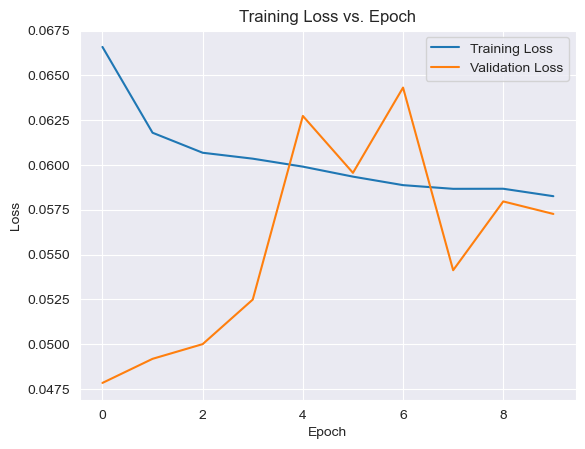

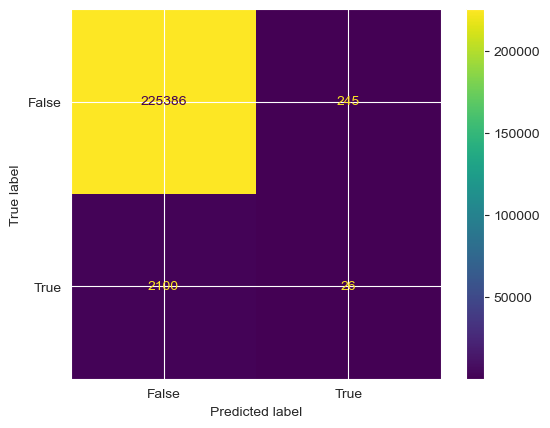

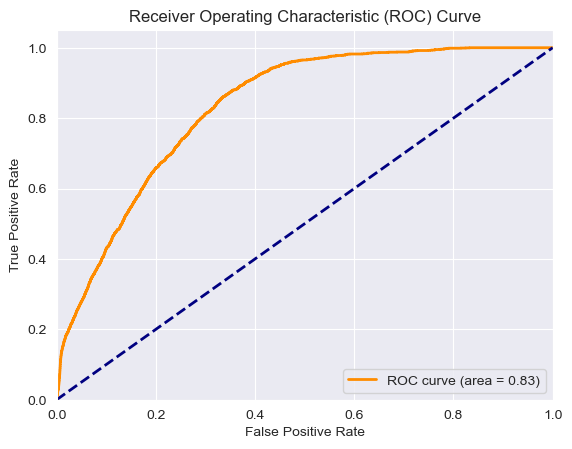

In [49]:
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.savefig(f"losses_pytorch_{version}.png")
print("######LOSS PLOT DONE######")

# Calculate confusion matrix
output = model(X_test)
# print("output", output)

opt_thres = -1
opt_prec = 0
liste_thresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
true_labels = y_test.int().tolist()
# print(output.tolist())
for i in liste_thresh:
    flattened_list = [item for sublist in output.tolist() for item in sublist]
    predictions = list(map(lambda x: int(x >= i), flattened_list))

    precision = metrics.precision_score(true_labels, predictions)

    # Recall
    recall = metrics.recall_score(true_labels, predictions)
    # F1-Score
    f1 = metrics.f1_score(true_labels, predictions)
    # ROC Curve and AUC
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1-Score:", f1)
    # print("ROC AUC:", roc_auc)

    if precision > opt_prec:
        opt_thres = i
        opt_prec = precision
print(f"optimal threshold {opt_thres}, with precision {opt_prec}")

predictions = output.round().int().tolist()  # Converting tensor to list of integers
true_labels = y_test.int().tolist()  # Converting tensor to list of integers

confusion_matrix = metrics.confusion_matrix(true_labels, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.savefig(f"Confusion_Matrix_pytorch_{version}.png")
print("######CONFUSION MATRIX PLOT DONE######")

# Extract TN, FP, TP values
TN = confusion_matrix[0, 0]  # True Negatives
FP = confusion_matrix[0, 1]  # False Positives
FN = confusion_matrix[1, 0]  # False Negatives
TP = confusion_matrix[1, 1]  # True Positives

# Print the results
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

# Precision 
precision = metrics.precision_score(true_labels, predictions)
# Recall 
recall = metrics.recall_score(true_labels, predictions)
# F1-Score 
f1 = metrics.f1_score(true_labels, predictions)
# ROC Curve and AUC 
fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# print(output.device)
output_cpu = output.cpu().detach().numpy()

fpr, tpr, thresholds = metrics.roc_curve(y_test.tolist(), output_cpu.tolist())
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(f"ROC_AUC_pytorch_{version}.png")
print("######ROC-AUC PLOT DONE######")

# Generate a classification report
class_report = classification_report(y_test.tolist(), predictions)
print("Classification Report:\n", class_report)

y_test_cpu = y_test.cpu()
y_test_list = y_test_cpu.tolist()

# Convert predictions to list
predictions_list = list(np.hstack(predictions))

y_test_series = pd.Series(list(np.hstack(y_test_list)))
count_occ = y_test_series.value_counts(normalize=True)

# Calculate the weighted accuracy
weighted_acc = (np.sum((y_test_series == 1) == predictions_list) * count_occ[0] + np.sum(
    (y_test_series == 0) == predictions_list) * count_occ[1]) / len(y_test_list)

print("Weighted Accuracy:", weighted_acc)

macro_f1 = metrics.f1_score(true_labels, predictions, average='macro')

print("Macro F1 Score:", macro_f1)

In [50]:
y_train.shape, y_test.shape

(torch.Size([683270]), torch.Size([227757]))

In [51]:
lensldnnf

NameError: name 'lensldnnf' is not defined

In [ ]:
print("######LOAD MODEL######")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(X_train.size())
model = load_model(model, f"best_torch_{version}_model_max_val_prec.pth")
model = model.to(device)
model.eval()

In [ ]:
model = model.cpu()
my_model = nn.Sequential(*list(list(model.children())[0].children())[1:])
my_model.eval()
my_model

In [ ]:
import numpy as np
import pandas as pd

def model_forward(input):
    input2 = torch.tensor(input.values, dtype=torch.float32)
    output = my_model(input2)
    return pd.DataFrame(output.detach().cpu().numpy())

X_train_np = X_train.detach().cpu().numpy()
X_test_np = X_test.detach().cpu().numpy()

X_train_df = pd.DataFrame(X_train_np, columns=feature_names)
X_test_df = pd.DataFrame(X_test_np, columns=feature_names)

In [ ]:
background_data_kmeans = shap.kmeans(X_train_df, k=500)

In [ ]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=500)

In [ ]:
def model_forward(input):
    input2 = torch.tensor(input, dtype=torch.float32)
    output = my_model(input2)
    return output.detach().cpu().numpy()

In [ ]:
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)
test_data_sample = shap.sample(X_test_np, 100)
shap_values = explainer.shap_values(test_data_sample)

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values, X_test_df)


In [ ]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=100)
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)

In [ ]:
test_data_sample = shap.sample(X_test_np, 1000)
shap_values = explainer.shap_values(test_data_sample)

In [ ]:
shap.summary_plot(shap_values, X_test_df)

In [ ]:
background_data_kmeans_np = shap.kmeans(X_train_np, k=50)
explainer = shap.KernelExplainer(model_forward, background_data_kmeans_np)

In [ ]:
test_data_sample = shap.sample(X_test_np, 10000)
shap_values = explainer.shap_values(test_data_sample)

In [ ]:
shap.summary_plot(shap_values, X_test_df)

In [ ]:
shap_values[0].shape

In [ ]:
X_test_df.shape

In [ ]:
len(feature_names)

In [ ]:
shap.summary_plot(shap_values[0], test_data_sample, feature_names = X_test_df.columns)

In [ ]:
X_test_df["Cluster_x"]

just encode cluster kein großer vorteil:
Validation Accuracy: 0.9984 -> 0.9985
print("Macro F1 Score:", macro_f1)
weighted Accuracy: 0.9890669714056618 -> 0.9877571340882394
Macro F1 Score: ? -> 0.9049004048797133

Rec: ? -> 0.68...

war ohne profile und cluster

mit cluster:
w acc: 0.9893...
re 0.847
pre 0.9994
m f1 0.964
mit beidem:

In [ ]:
import matplotlib
import pandas as pd
import torch
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",", na_values=[''])
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)

# List of columns to keep
columns_to_keep = ['explicit', 'track_number', 'num_artists', 'num_available_markets',
                   'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
                   'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'valence', 'tempo', 'betweenesscentrality_x',
                   'closnesscentrality_x', 'clustering_x', 'degree_x', 'eccentricity_x',
                   'eigencentrality_x', 'weighted degree_x', 'pagerank_x',
                   'betweenesscentrality_y', 'closnesscentrality_y', 'clustering_y',
                   'degree_y', 'eccentricity_y', 'eigencentrality_y', 'weighted degree_y',
                   'pagerank_y', 'artist1_num', 'artist2_num', 'years_on_charts',
                   'superstar_v1_x', 'superstar_v1_y', 'superstar_v2_x', 'superstar_v2_y',
                   'superstar_v3_x', 'superstar_v3_y', 'superstar_v4_x', 'superstar_v4_y',
                   'superstar_v5_x', 'superstar_v5_y', 'success_rate_x', 'success_rate_y',
                   'hits_in_past_x', 'hits_in_past_y', 'superstar_x', 'superstar_y',
                   'Cluster_x', 'Cluster_y','profile_x', 'profile_y', "hit"]
    
    

# Drop columns not in the list
data = data[columns_to_keep]


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit"])
X[["Cluster_x", "Cluster_y", "explicit"]] = X[["Cluster_x", "Cluster_y", "explicit"]].astype(object)


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    # One-hot encode categorical features
    encoder = OneHotEncoder(handle_unknown='ignore')
    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = encoder.fit_transform(df[categorical_cols])

    print(categorical_cols)

    # Convert the sparse matrix to dense array
    df_encoded_dense = df_encoded.toarray()

    print(df_encoded)
    print(df_normalized)
    print(df_normalized.shape)
    print(df_encoded_dense.shape)

    # Concatenate numerical and encoded categorical features
    df_processed = np.hstack([df_normalized.values, df_encoded_dense])

    return df_processed


In [ ]:
# X.drop(columns=["date"], inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
X.info()

In [ ]:
feature_names = X_train.columns
#X_train = preprocess(X_train, min_max_val)
#X_test = preprocess(X_test, min_max_val)
feature_names

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_train

In [ ]:
X_train.iloc[0:5]

In [ ]:
preprocess(X_train.iloc[:], min_max_values=min_max_val)

current version is kind of dumb drop unnecessary ones out but therefore can have variable output size.

=> change it accordingly
 

In [ ]:
X["explicit"].nunique()

number of unique items:

p_x 9
p_y 8
C_x 7
C_y 7
e 1

total: 33

for get_dummies 28???

In [ ]:
# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=["Cluster_x", "Cluster_y", "profile_x", "profile_y", "explicit"], drop_first=True)

# Extract the encoded columns
encoded_columns = [col for col in X_encoded.columns if any(orig_col in col for orig_col in ["Cluster_x", "Cluster_y", "profile_x", "profile_y", "explicit"])]

# Select only the encoded columns
X_test_encoded_only = X_encoded[encoded_columns]

# Display the encoded columns
X_test_encoded_only

In [ ]:
X_test = pd.get_dummies(X_test, columns=["Cluster_x", "Cluster_y", "profile_x", "profile_y", "explicit"], drop_first=True)
X_test

In [ ]:
def preprocess_v2(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    # One-hot encode categorical features
    #encoder = OneHotEncoder(handle_unknown='ignore')
    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)     #questionable whether true or false
    
    encoded_columns = [col for col in df_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]
    #df_encoded = encoder.fit_transform(df[categorical_cols])

    print(categorical_cols)
    print(encoded_columns)
    #print(df_encoded)

    # Convert the sparse matrix to dense array
    #df_encoded_dense = df_encoded.toarray()

    # print(df_encoded)
    # print(df_normalized)
    # print(df_normalized.shape)
    # print(df_encoded_dense.shape)

    # Concatenate numerical and encoded categorical features
    df_processed = pd.concat([df_normalized, df_encoded[encoded_columns]], axis=1)

    return df_processed

In [ ]:
preprocess(X, min_max_val)

In [ ]:
prep =  preprocess_v2(X, min_max_val)
prep